*Берем данные*

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data


*Рандомно поределяем центры для k класстеров*

In [2]:
k = 3
means = [X[i] for i in np.random.choice(X.shape[0], k, replace=False)]
print(means)

[array([5. , 3.4, 1.6, 0.4]), array([4.5, 2.3, 1.3, 0.3]), array([6.2, 2.9, 4.3, 1.3])]


*Цвета и массив для класстеров*

In [3]:
COLORS = ('green', 'blue', 'brown', 'black')
_X = [[] for i in range(k)]

In [4]:
def ro(object, mean):
    return np.linalg.norm(object-mean)

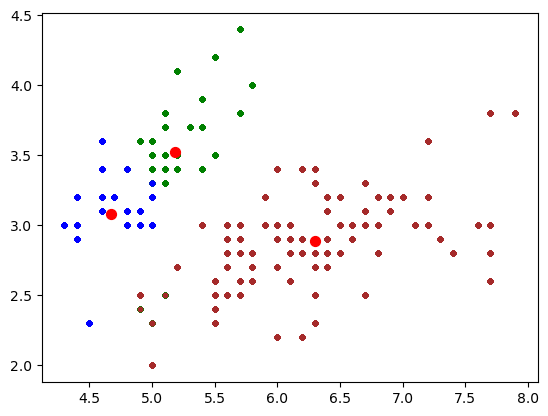

In [5]:
plt.ion()
n = 0

import time
while n < 30:
    
    # Считаем расстояние от каждого объекта до центров и относим их к ближайшим классам
    for object in X:
        r = [ro(object, mean) for mean in means]
        _X[np.argmin(r)].append(object)

    # Пересчитываем центры для каждого класса
    means = [np.mean(class_objects, axis=0) for class_objects in _X] # _X массив с k классами 

    plt.clf()
    # отображение найденных кластеров
    for i in range(k):
        class_objects = np.array(_X[i]).T
        plt.scatter(class_objects[0], class_objects[1], s=10, color=COLORS[i])

    # отображение центров кластеров
    mx = [m[0] for m in means]
    my = [m[1] for m in means]
    plt.scatter(mx, my, s=50, color='red')

    plt.draw()
    plt.gcf().canvas.flush_events()
#    plt.savefig(f"lloyd {n+1}.png")

    n += 1

plt.ioff()